## Import libraries

In [30]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import seaborn as sns
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

In [31]:
#Importing the load iris dataset
from sklearn import datasets
iris_data = datasets.load_iris()
print(type(iris_data))
list(iris_data.keys())

<class 'sklearn.utils._bunch.Bunch'>


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

## Data Analysis

In [32]:
print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
df = pd.DataFrame(data=iris_data['data'], columns=iris_data['feature_names'])
df['Species'] = iris_data['target']
df.to_csv("iris_data.csv", index=False)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [35]:
df.groupby("Species").describe()

sepal length (cm)                                              \
                    count   mean       std  min    25%  50%  75%  max   
Species                                                                 
0                    50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                    50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

        sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                   count   mean  ...               75%  max            count   
Species                          ...                                           
0                   50.0  3.428  ...             1.575  1.9             50.0   
1                   50.0  2.770  ...             4.600  5.1             50.0   
2                   50.0  2.974  ...             5.875  6.9             50.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Species                                            
0        0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1        1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2        2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

## Visualization

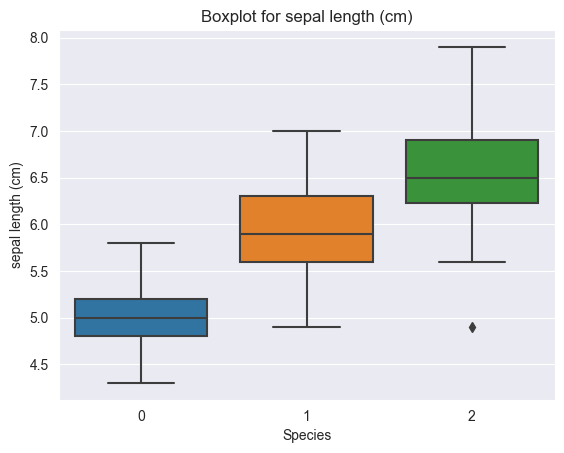

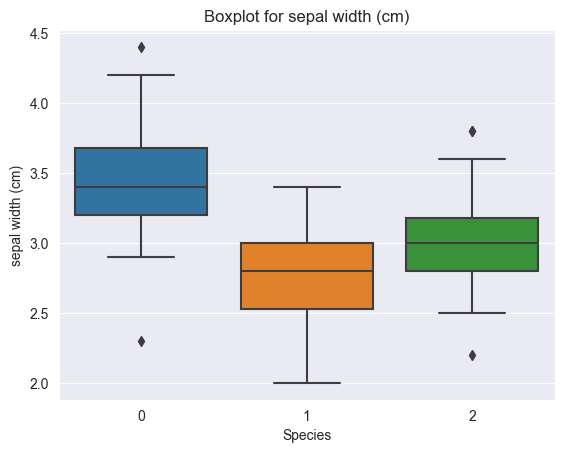

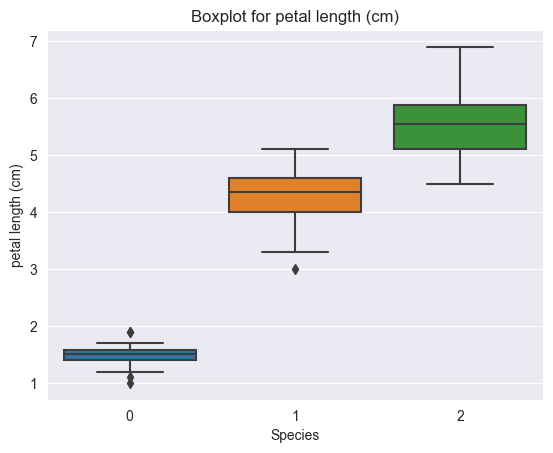

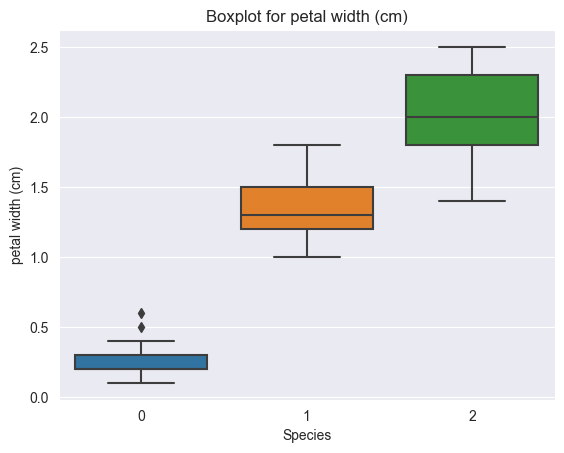

In [37]:
# Box plot
for feature in df.columns[:-1]:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

array([[<AxesSubplot: title={'center': 'sepal length (cm)'}>,
        <AxesSubplot: title={'center': 'sepal width (cm)'}>],
       [<AxesSubplot: title={'center': 'petal length (cm)'}>,
        <AxesSubplot: title={'center': 'petal width (cm)'}>]],
      dtype=object)

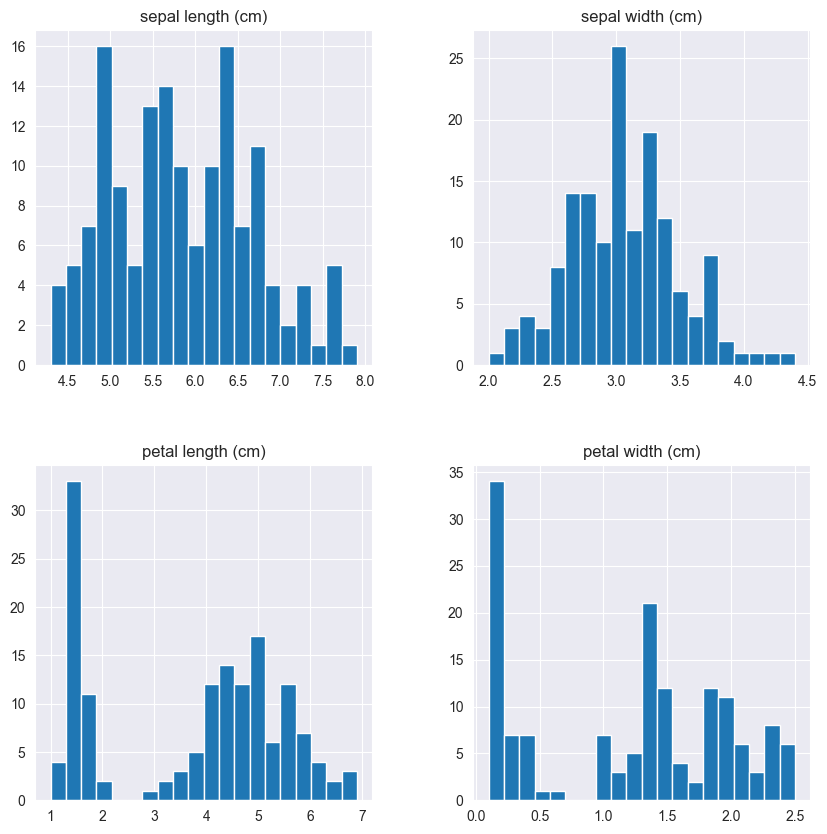

In [38]:
df.drop('Species',axis=1).hist(bins=20,figsize=(10,10))

In [39]:
df.columns = ["Sepallength","Sepalwidth","Petallength","Petalwidth","Species"]

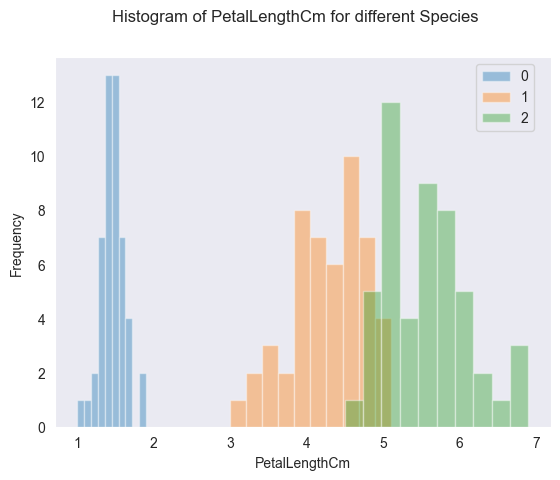

In [40]:
df.groupby('Species').Petallength.plot.hist(alpha=0.4)
plt.xlabel('PetalLengthCm')
plt.suptitle('Histogram of PetalLengthCm for different Species')
plt.legend(loc=(0.85,0.8))
plt.grid()

<AxesSubplot: xlabel='Petallength', ylabel='Petalwidth'>

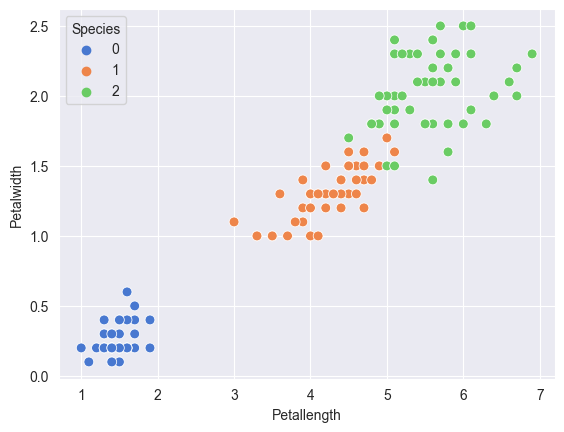

In [41]:
# Paired plots
#plt.figure(figsize=(5,4))
sns.set_style('darkgrid')
sns.scatterplot(data=df,x='Petallength',y='Petalwidth',hue='Species',palette="muted",alpha=1,s=50)

Text(0.5, 1.0, 'Sepalwidth vs Sepallength')

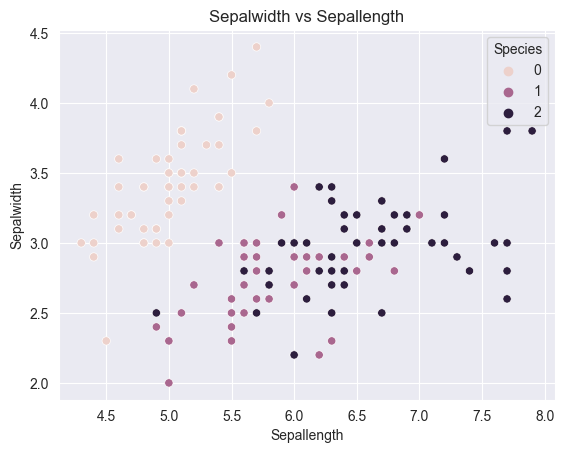

In [42]:
# Paired plot
sns.set_style('darkgrid')
sns.scatterplot(data=df,x='Sepallength',y='Sepalwidth',hue='Species')
plt.title("Sepalwidth vs Sepallength")

<function matplotlib.pyplot.show(close=None, block=None)>

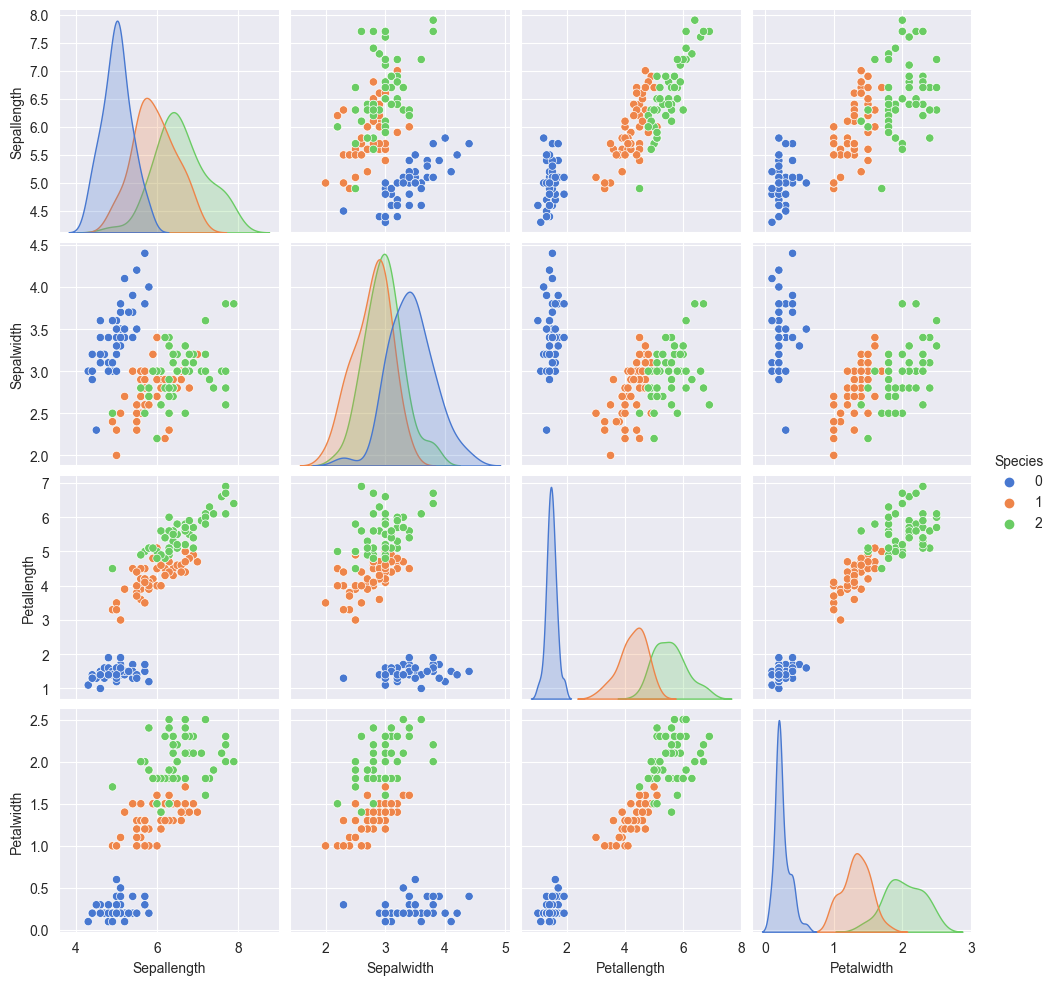

In [43]:
#Pairplot
sns.pairplot(df,hue = 'Species',palette='muted')
plt.show

## Outlier treatment

In [ ]:
# Function to add outliers to each feature
def add_outliers(df, feature, n_outliers=10):
    np.random.seed(42)
    outliers = np.random.normal(loc=5, scale=3, size=n_outliers)
    indices = np.random.choice(df.index, n_outliers, replace=False)
    #new_rows = [{feature: outlier} for outlier in outliers]
    #df = df.append(new_rows, ignore_index=True)

    #return df

    df.loc[indices, feature] += outliers

In [ ]:
# Add outliers to each feature
for feature in df.columns[:-1]:
    add_outliers(df, feature)

In [ ]:
# Box plot
for feature in df.columns[:-1]:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
df.shape

In [ ]:
def treat_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    # Fill outliers with the median value
    #df.loc[df[feature] < lower_bound, feature] = df[feature].median()
    #df.loc[df[feature] > upper_bound, feature] = df[feature].median()

    return df

In [ ]:
# Treat outliers using IQR for each feature
for feature in df.columns[:-1]:
    df= treat_outliers_iqr(df, feature)


In [ ]:
df.shape

In [ ]:
# Box plot
for feature in df.columns[:-1]:
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
# Identifying and treating outliers with z score
from scipy.stats import zscore

def treat_outliers_zscore(df, feature, threshold=3):
    # Calculate the Z-score for the specified feature
    z_scores = zscore(df[feature])

    # Identify and replace outliers with NaN
    outliers_mask = np.abs(z_scores) > threshold
    df.loc[outliers_mask, feature] = np.nan

    return df

# Treat outliers using Z-score for each feature
for feature in df.columns[:-1]:
    df_new = treat_outliers_zscore(df, feature)


In [ ]:
for feature in df.columns[:-1]:
    add_outliers(df, feature)

In [ ]:
df.shape

## Model implementation

In [ ]:
#iris_data["data"][:,(2,3)]
iris_data["data"].shape

In [ ]:
#X = iris_data["data"][:, (2, 3)] # petal length, petal width
X = iris_data["data"][:, (0, 1)] # Sepal length, Sepal width
y = iris_data["target"]

print(X.shape)
print(y.shape)

In [ ]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('Size of training set:', len(X_train))
n = len(X_train)
print('Size of testing set:', len(X_test))
print('y train:')
print(y_train)
print('y test:')
print(y_test)

In [ ]:
# Implementing the model
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)


In [26]:
# Predictinon on test dataset
y_pred = softmax_reg.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [27]:
# Predicting probabilities
y_prob_pred= softmax_reg.predict_proba(X_test)
y_prob_pred

array([[9.55068766e-01, 3.43709136e-02, 1.05603206e-02],
       [1.13432832e-01, 6.59419476e-01, 2.27147692e-01],
       [1.16311987e-04, 4.07178871e-01, 5.92704817e-01],
       [9.93678101e-01, 5.24673754e-03, 1.07516098e-03],
       [2.28500710e-06, 1.98340265e-01, 8.01657450e-01],
       [2.96722966e-04, 2.57216431e-02, 9.73981634e-01],
       [2.69927404e-05, 3.39903231e-01, 6.60069777e-01],
       [9.98309489e-01, 1.46541714e-03, 2.25094088e-04],
       [9.94095701e-01, 5.18027214e-03, 7.24027332e-04],
       [5.31623201e-05, 3.53968011e-01, 6.45978827e-01],
       [1.60383056e-02, 6.36665512e-01, 3.47296182e-01],
       [9.93678101e-01, 5.24673754e-03, 1.07516098e-03],
       [3.23961341e-06, 2.77000304e-01, 7.22996456e-01],
       [1.81469962e-03, 4.94696161e-01, 5.03489140e-01],
       [7.11636529e-04, 1.10379506e-01, 8.88908857e-01],
       [9.99159291e-01, 7.65355720e-04, 7.53536161e-05],
       [2.13597590e-03, 5.75742027e-01, 4.22121997e-01],
       [1.04986585e-01, 6.16086

## Evaluation metrics

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_fscore_support
print("Accuracy: ",accuracy_score(y_test,y_pred))
score = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ",score[0])
print("Recall: ",score[1])
print("fscore: ",score[2])

Accuracy:  0.8333333333333334
Precision:  0.8484848484848485
Recall:  0.8717948717948718
fscore:  0.8225957049486462


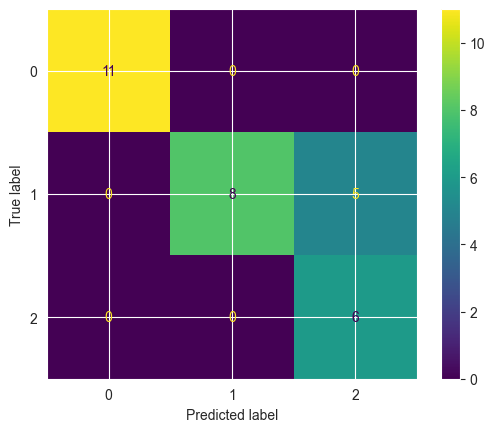

In [29]:
confusion_matrix_= confusion_matrix(y_test,y_pred)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_,
                            display_labels=softmax_reg.classes_)
disp.plot()
plt.show()